In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
#from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
corrosion_data = pd.read_csv('/content/data  amalgamation.csv')

In [3]:
corrosion_data.head()

,Feedstock Materials,Substrate,Corrosion Rate(um/year),Electrolyte Molten Salt,Temperature(degree C),Time(hr),Manufacturing Process,Powder Particle Size(um),Melting range(degree C),Density(g/cm^3),Porosity(%),Hardness Brinell_HB,TensileStrength (Mpa),ModulusofElasticity(Gpa),Electrical Resistivity(ohm-cm),ThermalConductivity(W/m.K)
0,nil,4340 Steel,0.55,NaCl,25.0,0,nil,0,0.0,7.85,0.0,217,470,192,0.000030,44.5
1,nil,4130 Steel,0.09,NaCl,150.0,720,nil,0,0.0,7.85,0.0,217,470,192,0.000030,44.5
2,nil,4130 Steel,0.29,NaCl,200.0,720,nil,0,0.0,7.85,0.0,217,470,192,0.000030,44.5
3,nil,1020 Steel,2.10,HCl,500.0,360,nil,0,0.0,7.87,0.0,111,205,186,0.000029,51.9
4,nil,1020 Steel,0.30,HCl,400.0,360,nil,0,0.0,7.87,0.0,111,205,186,0.000029,51.9


In [4]:
corrosion_data.shape

(155, 16)

In [5]:
corrosion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Feedstock Materials             155 non-null    object 
 1   Substrate                       155 non-null    object 
 2   Corrosion Rate(um/year)         155 non-null    float64
 3   Electrolyte Molten Salt         155 non-null    object 
 4   Temperature(degree C)           155 non-null    float64
 5   Time(hr)                        155 non-null    int64  
 6   Manufacturing Process           155 non-null    object 
 7   Powder Particle Size(um)        155 non-null    int64  
 8   Melting range(degree C)         155 non-null    float64
 9   Density(g/cm^3)                 155 non-null    float64
 10  Porosity(%)                     155 non-null    float64
 11  Hardness Brinell_HB             155 non-null    int64  
 12  TensileStrength (Mpa)           155 

In [6]:
# encoding "Substrate" Column
corrosion_data.replace({'Substrate':{'4340 Steel':0,'4130 Steel':1,'1020 Steel':2, 'low-carbon stainless steel':3,
                                     'Ti-stabilised high-carbon stainless steel':4, 'Ni-based superalloy':5, '12H18N10T':6, 'HN80MT':7,
                                     'AP–164':8, 'HN80MTY':9, 'HN80M-VI':10, 'MONICR':11, 'HN80MTW':12, 'Stainless Steel':13, 'Inconel':14,
                                     'Hastelloy':15, 'Ferritic stainless steel':16, 'Nimonic alloy 263':17, 'Iron based alloy (SAN25)':18,
                                     'nil':19, 'Nickel based superalloy C263':20, 'Nickel based superalloy':21, 'C263':22,
                                     'Ni alloy Inconel 713LC':23, 'Stainless steel-316L':24, 'SA516 steel':25}},inplace=True)

In [7]:
# encoding "Feedstock Materials" Column
corrosion_data.replace({'Feedstock Materials':{'nil':0, 'NiCr':1, 'IN625':2, 'Ni':3, 'NiCoCrAlY + YSZ':4, 'NiCoCrAlTaY+ScYSZ':5,
                                               'YSZ/NiCoCrAlY':6, 'LZ-LZC/YSZ/NiCoCrAlY':7,
                                               '([La(NO3)3.6H2O], [Ce(NO3)3.6H2O], and [Zr(C2H4O2)4])':8, 'SHS9172':9, 'Diamalloy 4006':10,
                                               'YSZ':11, 'Al2O3':12, 'Ni20Cr':13}},inplace=True)

In [8]:
# encoding "Manufacturing Process" Column
corrosion_data.replace({'Manufacturing Process':{'nil':0, 'HVOF':1, 'APS':2, 'PSP':3, 'CGDS':4}},inplace=True)

In [9]:
# encoding "Electrolyte Molten Salt" Column
corrosion_data.replace({'Electrolyte Molten Salt':{'NaCl':0, 'HCl':1, 'LiCl–KCl–CsCl':2, '46.5LiF–11.5NaF–42KF':3, '92NaBF4–8NaF':4,
                                                   '71.7LiF–16BeF2–12ThF4–0.3UF4 + Te':5, '66LiF–34BeF2 + UF4':6,
                                                   '15LiF–58NaF–27BeF2 + PuF3':7, '15LiF–58NaF + 27BeF2 + Cr3Te4':8,
                                                   '73LiF–5BeF2–20ThF4–2UF4 + Cr3Te4':9, '71LiF–27BeF2–2UF4 + Cr3Te4':10,
                                                   'LiCl-Li2O-Li':11, '71LiF-29BeF2':12, '53LiF-46BeF2-1UF4':13,
                                                   '60LiF-36BeF2-5UF4':14, '62LiF-37BeF2-1UF4':15, '58LiF-35BeF2-7ThF4':16,
                                                   '71LiF-16BeF2-13ThF4':17, '62LiF-36.5BeF2-1ThF4-0.5UF4':18, '70LiF-10BeF2-20UF4':19,
                                                   '60LiF-36BeF2-4UF4':20, '53LiF-46BeF2-0.5ThF4-0.5UF4':21, '(NaCl,Na2SO4,KCl)+10% H2O':22,
                                                   'FLiNaK':23, '50wt% Na2SO4+50wt%V2O5':24, 'Na2SO4 + V2O5':25, '50%Na2SO4 + 50%V2O5':26,
                                                   'NaCl,Na2SO4,KCl':27, 'LiCl-Li2O':28, 'LiCl-KCl':29, '(NaCl,Na2SO4,KCl)+ 10% H2O':30,
                                                   'nil':31}},inplace=True)

In [10]:
# encoding "Substrate" Column
corrosion_data.replace({'Substrate':{'4340 Steel':0,'4130 Steel':1,'1020 Steel':2, 'low-carbon stainless steel':3,
                                     'Ti-stabilised high-carbon stainless steel':4, 'Ni-based superalloy':5, '12H18N10T':6, 'HN80MT':7,
                                     'AP–164':8, 'HN80MTY':9, 'HN80M-VI':10, 'MONICR':11, 'HN80MTW':12, 'Stainless Steel':13, 'Inconel':14,
                                     'Hastelloy':15, 'Ferritic stainless steel':16, 'Nimonic alloy 263':17, 'Iron based alloy (SAN25)':18,
                                     'nil':19, 'Nickel based superalloy C263':20, 'Nickel based superalloy':21, 'C263':22,
                                     'Ni alloy Inconel 713LC':23, 'Stainless steel-316L':24, 'SA516 steel':25}},inplace=True)

In [11]:
# encoding "Feedstock Materials" Column
corrosion_data.replace({'Feedstock Materials':{'nil':0, 'NiCr':1, 'IN625':2, 'Ni':3, 'NiCoCrAlY + YSZ':4, 'NiCoCrAlTaY+ScYSZ':5,
                                               'YSZ/NiCoCrAlY':6, 'LZ-LZC/YSZ/NiCoCrAlY':7,
                                               '([La(NO3)3.6H2O], [Ce(NO3)3.6H2O], and [Zr(C2H4O2)4])':8, 'SHS9172':9, 'Diamalloy 4006':10,
                                               'YSZ':11, 'Al2O3':12, 'Ni20Cr':13}},inplace=True)

In [12]:
# encoding "Manufacturing Process" Column
corrosion_data.replace({'Manufacturing Process':{'nil':0, 'HVOF':1, 'APS':2, 'PSP':3, 'CGDS':4}},inplace=True)

In [13]:
# encoding "Time(hr)" Column
corrosion_data.replace({'Time(hr)':{'nil':0, '13,155':13155, '15,038':15038, '14,563':14563, '15,140':15140, '14,503':14503, '14,498': 14498,
                                    '20,000': 20000}},inplace=True)

In [14]:

# encoding "Powder Particle Size(um)" Column
corrosion_data.replace({'Powder Particle Size(um)':{'nil':0}},inplace=True)

# encoding "Melting range(degree C)" Column
corrosion_data.replace({'Melting range(degree C)':{'nil':0}},inplace=True)

# encoding "Density(g/cm^3)" Column
corrosion_data.replace({'Density(g/cm^3)':{'nil':0}},inplace=True)

# encoding "Porosity(%)" Column
corrosion_data.replace({'Porosity(%)':{'nil':0}},inplace=True)

# encoding "Hardness Brinell_HB" Column
corrosion_data.replace({'Hardness Brinell_HB':{'nil':0}},inplace=True)

# encoding "TensileStrength (Mpa)" Column
corrosion_data.replace({'TensileStrength (Mpa)':{'nil':0}},inplace=True)

# encoding "ModulusofElasticity(Gpa)" Column
corrosion_data.replace({'ModulusofElasticity(Gpa)':{'nil':0}},inplace=True)

# encoding "Electrical Resistivity(ohm-cm)" Column
corrosion_data.replace({'Electrical Resistivity(ohm-cm)':{'nil':0}},inplace=True)

# encoding "ThermalConductivity(W/m.K)" Column
corrosion_data.replace({'ThermalConductivity(W/m.K)':{'nil':0}},inplace=True)

In [15]:
# encoding "Electrolyte Molten Salt" Column
corrosion_data.replace({'Electrolyte Molten Salt':{'NaCl':0, 'HCl':1, 'LiCl–KCl–CsCl':2, '46.5LiF–11.5NaF–42KF':3, '92NaBF4–8NaF':4,
                                                   '71.7LiF–16BeF2–12ThF4–0.3UF4 + Te':5, '66LiF–34BeF2 + UF4':6,
                                                   '15LiF–58NaF–27BeF2 + PuF3':7, '15LiF–58NaF + 27BeF2 + Cr3Te4':8,
                                                   '73LiF–5BeF2–20ThF4–2UF4 + Cr3Te4':9, '71LiF–27BeF2–2UF4 + Cr3Te4':10,
                                                   'LiCl-Li2O-Li':11, '71LiF-29BeF2':12, '53LiF-46BeF2-1UF4':13,
                                                   '60LiF-36BeF2-5UF4':14, '62LiF-37BeF2-1UF4':15, '58LiF-35BeF2-7ThF4':16,
                                                   '71LiF-16BeF2-13ThF4':17, '62LiF-36.5BeF2-1ThF4-0.5UF4':18, '70LiF-10BeF2-20UF4':19,
                                                   '60LiF-36BeF2-4UF4':20, '53LiF-46BeF2-0.5ThF4-0.5UF4':21, '(NaCl,Na2SO4,KCl)+10% H2O':22,
                                                   'FLiNaK':23, '50wt% Na2SO4+50wt%V2O5':24, 'Na2SO4 + V2O5':25, '50%Na2SO4 + 50%V2O5':26,
                                                   'NaCl,Na2SO4,KCl':27, 'LiCl-Li2O':28, 'LiCl-KCl':29, '(NaCl,Na2SO4,KCl)+ 10% H2O':30,
                                                   'nil':31}},inplace=True)

In [16]:
# encoding "Corrosion Rate(um/year)" Column
corrosion_data.replace({'Corrosion Rate(um/year)':{'No Corrosion':0, 'No observable attack':1, 'Good corrosion resistance':2,
                                                   'Better Corrosion Resistance':3, 'High corrosion resistance':4,
                                                   'Excellent corrosion resistance':5, 'Coatings Protects from Corrosion':6,
                                                   'Corrosion on Coating': 7, 'Moderate surface roughening':8, 'Heavy surface roughening':9,
                                                   'Light surface roughening/Light surface roughening and pitting':10,
                                                   '-3':-3.0, '-0.005':-0.005, '-0.134':-0.134}},inplace=True)

In [17]:
corrosion_data.head()

,Feedstock Materials,Substrate,Corrosion Rate(um/year),Electrolyte Molten Salt,Temperature(degree C),Time(hr),Manufacturing Process,Powder Particle Size(um),Melting range(degree C),Density(g/cm^3),Porosity(%),Hardness Brinell_HB,TensileStrength (Mpa),ModulusofElasticity(Gpa),Electrical Resistivity(ohm-cm),ThermalConductivity(W/m.K)
0,0,0,0.55,0,25.0,0,0,0,0.0,7.85,0.0,217,470,192,0.000030,44.5
1,0,1,0.09,0,150.0,720,0,0,0.0,7.85,0.0,217,470,192,0.000030,44.5
2,0,1,0.29,0,200.0,720,0,0,0.0,7.85,0.0,217,470,192,0.000030,44.5
3,0,2,2.10,1,500.0,360,0,0,0.0,7.87,0.0,111,205,186,0.000029,51.9
4,0,2,0.30,1,400.0,360,0,0,0.0,7.87,0.0,111,205,186,0.000029,51.9


In [18]:
#co-relation
corelation = corrosion_data.corr()

<Axes: >

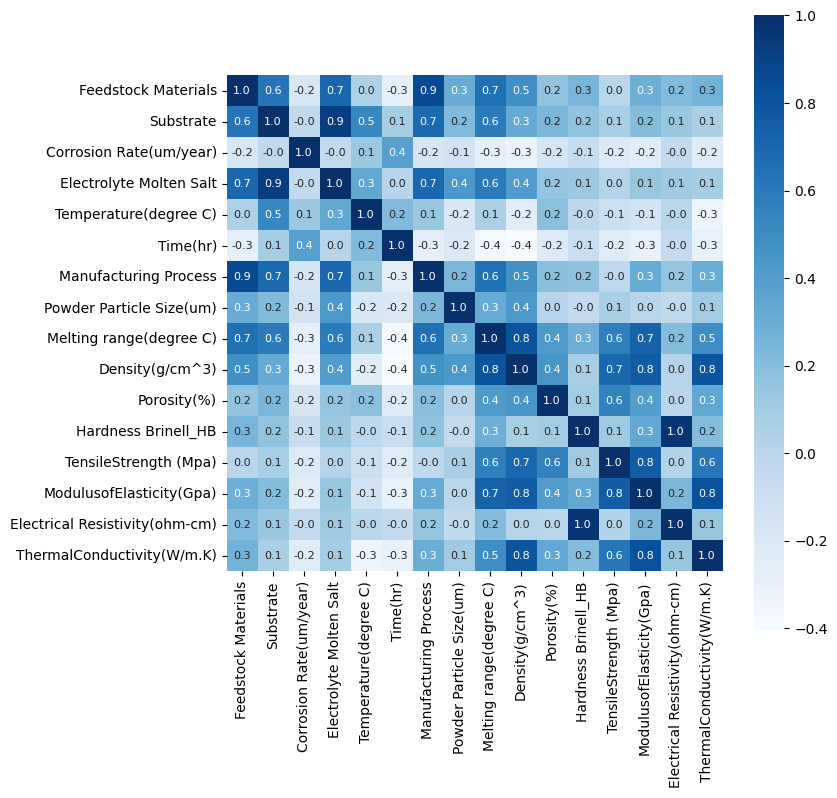

In [19]:
plt.figure(figsize = (8,8))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
#co-relation values
print(corelation['Corrosion Rate(um/year)'])

Feedstock Materials              -0.174539
Substrate                        -0.032405
Corrosion Rate(um/year)           1.000000
Electrolyte Molten Salt          -0.042117
Temperature(degree C)             0.134222
Time(hr)                          0.379813
Manufacturing Process            -0.168569
Powder Particle Size(um)         -0.135648
Melting range(degree C)          -0.272607
Density(g/cm^3)                  -0.312498
Porosity(%)                      -0.170152
Hardness Brinell_HB              -0.060659
TensileStrength (Mpa)            -0.211488
ModulusofElasticity(Gpa)         -0.244211
Electrical Resistivity(ohm-cm)   -0.034377
ThermalConductivity(W/m.K)       -0.236015
Name: Corrosion Rate(um/year), dtype: float64


<ipython-input-21-a41033f54175>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corrosion_data['Corrosion Rate(um/year)'], color='green')


<Axes: xlabel='Corrosion Rate(um/year)', ylabel='Density'>

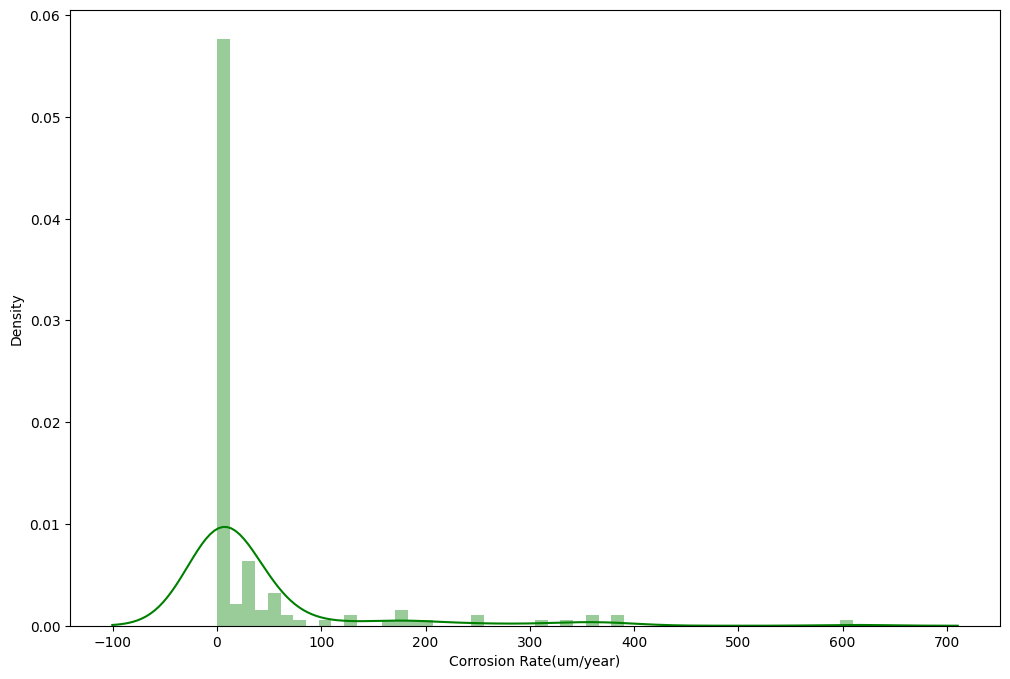

In [21]:
#checking the distributio of corrosion rate
plt.figure(figsize=(12,8))
sns.distplot(corrosion_data['Corrosion Rate(um/year)'], color='green')

In [22]:
# X = corrosion_data.drop(['References','Corrosion Rate(um/year)'],axis=1)
X = corrosion_data.drop(['Corrosion Rate(um/year)'],axis=1)
Y = corrosion_data['Corrosion Rate(um/year)']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

User can replace the regression model by removing the '#'

Note: when you use one regression model, make sure other models are commneted like '#'.

In [25]:
# loading the linear regression model
lin_reg_model =   RandomForestRegressor() #AdaBoostRegressor() #GradientBoostingRegressor() #SVR() #Lasso() #LinearRegression() #Ridge()

In [26]:
lin_reg_model.fit(X_train,Y_train)

RandomForestRegressor()

In [27]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [28]:
# R squared Error for train
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9475903498225232


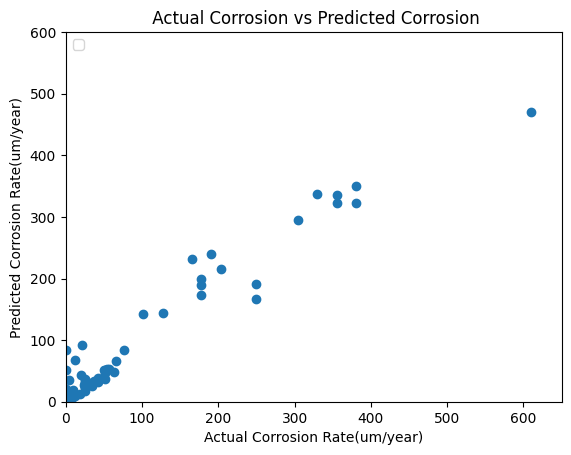

In [29]:
plt.scatter(Y_train, training_data_prediction, marker='o')
#plt.scatter(training_data_prediction, Y_train, marker='v')
plt.xlabel("Actual Corrosion Rate(um/year)")
plt.ylabel("Predicted Corrosion Rate(um/year)")
plt.title(" Actual Corrosion vs Predicted Corrosion")
plt.legend(loc='upper left')
plt.xlim(0, 650)
plt.ylim(0, 600)
plt.show()

In [30]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [31]:
# R squared Error for test
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8450380239813341


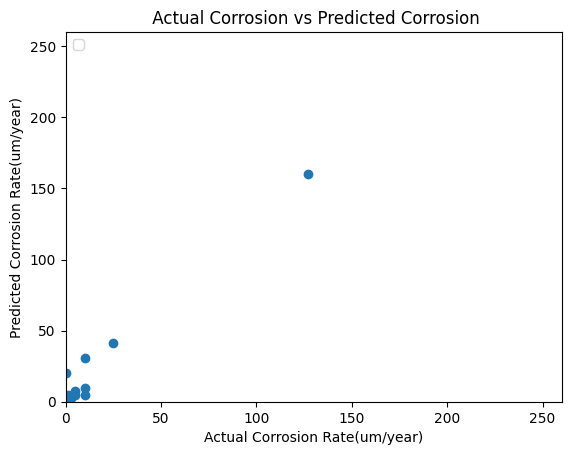

In [32]:
plt.scatter(Y_test, test_data_prediction, marker='o')
#plt.scatter(training_data_prediction, Y_train, marker='v')
plt.xlabel("Actual Corrosion Rate(um/year)")
plt.ylabel("Predicted Corrosion Rate(um/year)")
plt.title(" Actual Corrosion vs Predicted Corrosion")
plt.legend(loc='upper left')
plt.xlim(0, 260)
plt.ylim(0, 260)
plt.show()

In [35]:
# MAE Error for train data
error_score = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("MAE Error : ", error_score)

MAE Error :  9.2869073620608


In [36]:
# MAE Error for test data
error_score = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("MAE Error : ", error_score)

MAE Error :  6.70222082142857
